# Script de Análise de Bolsa de Valores

Desenvolvido por: Naime Andere
Contato: https://www.linkedin.com/in/naimeandere/ 

Descrição: 
Este script realiza uma análise de ações na bolsa de valores, 
fornecendo insights baseados em dados históricos e indicadores financeiros com linha de tendência. 
O objetivo é ajudar quem está iniciando nessa aárea de investimento poder olhar de outra maneira as ações para tomarem decisões informadas 
por meio de visualizações e relatórios automatizados.

É utilizado o pacote Yahoo Finance para buscar os dados online. 

Install Packages

In [1]:
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install numpy

Importar as Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
from dateutil.relativedelta import relativedelta

Função para baixar os dados do Yahoo Finance

In [3]:
def obter_dados(ticker, start_date,end_date):
    data = pd.DataFrame(yf.download(ticker,start=start_date, end=end_date))
    # Resetando o índice para transformar o índice 'Date' em uma coluna
    data.reset_index(inplace=True)

    return data

Função para criar os gráficos 

In [4]:
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Open'].values
    n = np.size(data['Open'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Low'].values
    n = np.size(data['Low'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[1].plot(data['Low'], label='Minima', color='green')
    axs[1].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['High'].values
    n = np.size(data['High'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

Plotar somente graficos de Closed

In [5]:
def plotar_graficos_fechamento(data):
    plt.plot(figsize=(10, 8), sharex=True)

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    plt.plot(data['Close'], label='Fechamento', color='purple')
    plt.plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    plt.ylabel('Fechamento')

    plt.xlabel(f'últimos {len(data)} dias')

    # Adiciona legenda
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Função para Gráficos comparativo

In [6]:
def plotar_graficos_comparativos(dados):
    
    plt.figure(figsize=(10,6))

    for dado in dados:
        X = (dado['Date'] - dado['Date'].min()).dt.days.values
        Y = (dado['Close'])
        plt.plot(X,Y)
        plt.grid()


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Função para criar uma lista de escolhas para facilitar para o usuário

In [7]:
def choose(options):
    # Exibir as opções disponíveis
    print("Escolha uma das opções abaixo:")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

    # Solicitar a entrada do usuário
    try:
        index = int(input("Digite o número da sua escolha: "))
        if 1 <= index <= len(options):
            return options[index - 1]
        else:
            return "Escolha inválida, índice fora do intervalo."
    except ValueError:
        return "Escolha inválida, por favor insira um número."

Define Ticker, data de inicio, data de fim e mandar rodar a função para buscar os dados e plotar no gráfico

Escolha uma das opções abaixo:
1. Um gráfico para cada ação
2. Todas as ações em um único gráfico
3. Plotar gráficos completos


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Você escolheu: Todas as ações em um único gráfico


******************************************************************


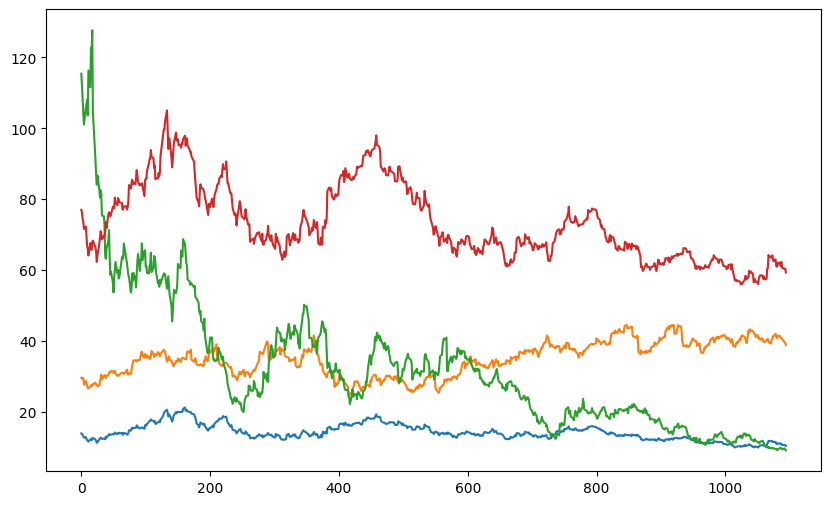

In [9]:
# recebe valor com nome das ações do usuario
inputTickers = input("Entre com os nome das ações separadas por virgura, ex: PETR3.SA,MGLU3.SA,VALE3.SA")
# recebe a quantidade de anos que deseja buscar
inputYear = input("Entre com tempo em anos do período da busca")

# cria uma lista com os valores recebidos
if len(inputTickers) > 0:
    tickers =  [valor.strip().upper() for valor in inputTickers.split(',') ] 
else:
    # caso o valor for em branco, entrão recebe valor padrão
    tickers = ["VALE","PETR3.SA","MGLU3.SA","VALE3.SA"]

# Data de término é sempre a data atual
end_date = today = datetime.date.today()

# verifica se teve data de início
if len(inputYear) > 0:
    start_date = end_date - relativedelta(years=int(inputYear))
else:
    # se receber valor em branco, então busca o valor padrão
    start_date = end_date - relativedelta(years=3)

# cria uma tabela para receber os dados
dados = []

#Cria a verificação de escolha de retorno
opcoes = ["Um gráfico para cada ação", "Todas as ações em um único gráfico","Plotar gráficos completos"]
escolha = choose(opcoes)
print(f"Você escolheu: {escolha}")

if escolha == "Um gráfico para cada ação":
    for ticker in tickers:
        dados = obter_dados(ticker,start_date,end_date)
        print('******************************************************************')
        info = yf.Ticker(ticker).info
        print(f"Nome: {info['shortName']}")
        print(f"Tipo: {info['industry']}")
        print(f"Datas entre: {start_date} e {end_date}")
        plotar_graficos_fechamento(dados)

elif escolha == "Todas as ações em um único gráfico":
# Faz a busca dos dados no servidor da Yahoo e adiciona na tabela
    for ticker in tickers:
        dados.append(obter_dados(ticker,start_date,end_date))
        
    print('******************************************************************')
    plotar_graficos_comparativos(dados)

elif escolha == "Plotar gráficos completos":
    for ticker in tickers:
        dados = obter_dados(ticker,start_date,end_date)
        info = yf.Ticker(ticker).info
        print('******************************************************************')
        print(f"Nome: {info['shortName']}")
        print(f"Tipo: {info['industry']}")
        print(f"Datas entre: {start_date} e {end_date}")
        plotar_graficos(dados)
